## Important Libraries

In [ ]:
import numpy as np      # For matrix operations
import pandas as pd     # For loading, examine, and manipulating data

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## Reading the dataset

Here I downloaded the stock price weekly data for "The PNC Financial Services Group, Inc. (PNC)" from [Yahoo Finance](https://finance.yahoo.com/quote/PNC/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS9zZWFyY2g_cT1wbmMrc2hhcmUrcHJpY2UrbnlzZSZybHo9MUM1Q0hGQV9lbklOOTY2SU45NjYmb3E9UE5DJmFxcz1jaHJvbWUuMS42OWk1N2o2OWk1OWo0Nmk2N2kxOTlpNDMzaTQ2NWowaTY3bDJqNjlpNjBsMy4zMTQ2ajBqNyZzb3VyY2VpZD1jaHJvbWUmaWU9VVRGLTg&guce_referrer_sig=AQAAAD5qcH_IDxJal1NnhZpSvZGk-mayjkfvmijo6uEngLJN9iXPXzD_QJ_aNvthN4-xT_ERTdQSRgVkcrUJV5TaE-j12WDdW5f9l00NOtGXGJoOpHqCyhT7MmlbWBl4qay1_whTMF7gqDo_qO_e9oKIUVHlFZJwURpqHQ32dt-fI18v).

In [ ]:
df = pd.read_csv("/content/PNC.csv", parse_dates=True)
df.shape

(3021, 7)

In [ ]:
# Storing date in correct format to perform various operations such as sorting.
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Date'])
df = df.reset_index()

In [ ]:
df.tail()

,index,Date,Open,High,Low,Close,Adj Close,Volume
3016,3016,2022-12-15,147.500000,150.410004,147.070007,150.179993,150.179993,3043400
3017,3017,2022-12-16,148.860001,150.889999,148.050003,150.389999,150.389999,7000000
3018,3018,2022-12-19,150.270004,152.539993,148.940002,150.160004,150.160004,2070500
3019,3019,2022-12-20,150.479996,153.690002,150.350006,151.679993,151.679993,2144700
3020,3020,2022-12-21,153.649994,155.490005,153.259995,153.899994,153.899994,1541600


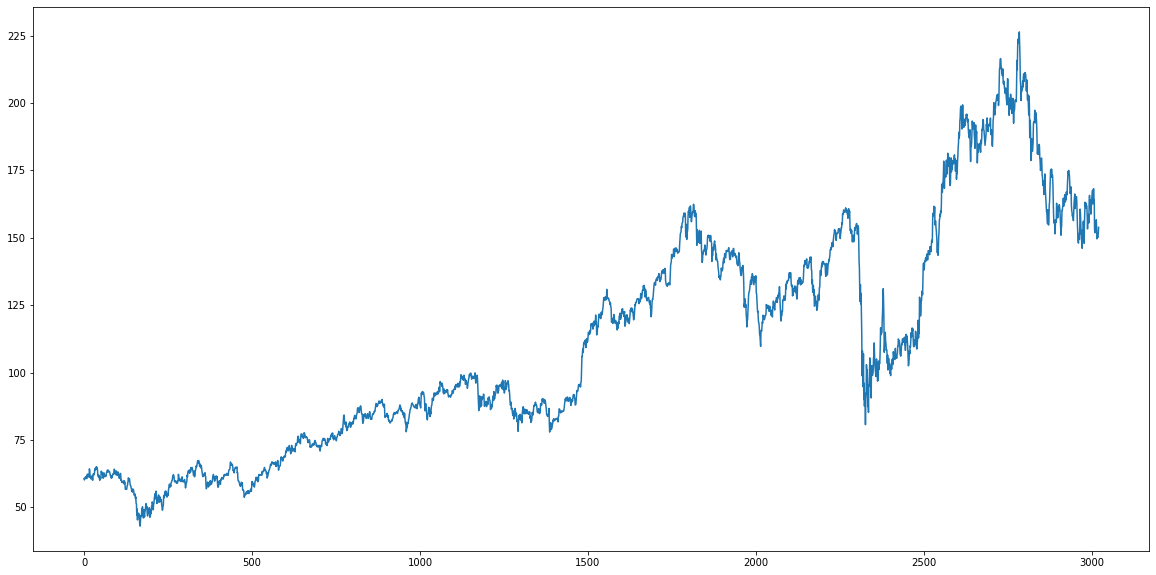

In [ ]:
# Representation of stock price over the period of time.

plt.figure(figsize=(20,10))
#df['Open'].plot()
#df['Low'].plot()
#df['High'].plot()
df['Close'].plot()

plt.show()

Now let's

In [ ]:
close = df[['Close']]
train = close.iloc[:2500]
val = close.iloc[2500:2750]
test = close.iloc[2750:]
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(train)
train = scaler.fit_transform(train)
val = scaler.fit_transform(val)
test = scaler.fit_transform(test)

In [ ]:
def create_dataset(dataset, time_step):
  dataX, dataY = [], []
  for i in range((dataset.shape[0])-time_step):
    dataX.append(dataset[i:i+time_step, 0])
    dataY.append(dataset[i+time_step,0])

  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 50

X_train, y_train = create_dataset(train, time_step)
X_val, y_val = create_dataset(val, time_step)

train.shape

(2500, 1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)
X_train.shape

(2450, 50, 1)

In [ ]:
X_test, y_test = create_dataset(test, time_step)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_test.shape

(221, 50, 1)

In [ ]:
Test1 = pd.DataFrame()
Train1 = pd.DataFrame()
Train1['close'] = pd.DataFrame(y_train)
Test1['close'] = df['Close'].iloc[2800:]
Train1.shape

(2450, 1)

In [ ]:
len = 221
b_size = 10

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
n_features = 1

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50, n_features)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
#model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=35, batch_size=32, verbose=1)

Epoch 1/50
77/77 [==============================] - 6s 24ms/step - loss: 0.0166 - val_loss: 0.0087
Epoch 2/50
77/77 [==============================] - 1s 11ms/step - loss: 0.0018 - val_loss: 0.0084
Epoch 3/50
77/77 [==============================] - 1s 10ms/step - loss: 0.0016 - val_loss: 0.0066
Epoch 4/50
77/77 [==============================] - 1s 10ms/step - loss: 0.0013 - val_loss: 0.0059
Epoch 5/50
77/77 [==============================] - 1s 10ms/step - loss: 0.0013 - val_loss: 0.0055
Epoch 6/50
77/77 [==============================] - 1s 10ms/step - loss: 0.0010 - val_loss: 0.0056
Epoch 7/50
77/77 [==============================] - 1s 10ms/step - loss: 8.8207e-04 - val_loss: 0.0048
Epoch 8/50
77/77 [==============================] - 1s 11ms/step - loss: 8.3226e-04 - val_loss: 0.0052
Epoch 9/50
77/77 [==============================] - 1s 10ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 10/50
77/77 [==============================] - 1s 10ms/step - loss: 7.0219e-04 - val_loss: 0.00

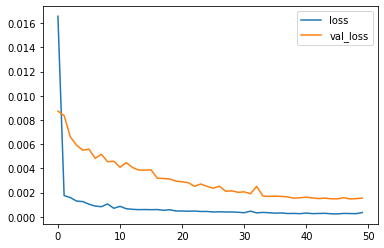

In [ ]:
losses= pd.DataFrame(model.history.history)

losses.plot()

In [ ]:
train_predict = scaler.inverse_transform(model.predict(X_train))
test_predict = scaler.inverse_transform(model.predict(X_test))

7/7 [==============================] - 0s 5ms/step


In [ ]:
print(model.predict(X_test[220].reshape(1,50,1)))

1/1 [==============================] - 0s 18ms/step
[[0.06789368]]


In [ ]:
print(X_test[220])

[[0.01941987]
 [0.        ]
 [0.08527332]
 [0.04456619]
 [0.12112549]
 [0.12498455]
 [0.06946349]
 [0.0231545 ]
 [0.12759865]
 [0.17826474]
 [0.21287197]
 [0.194199  ]
 [0.18523596]
 [0.20851487]
 [0.19556836]
 [0.19531934]
 [0.15697748]
 [0.08950582]
 [0.12921704]
 [0.13170673]
 [0.15610617]
 [0.11739086]
 [0.22071468]
 [0.24449147]
 [0.21374328]
 [0.2243247 ]
 [0.19332751]
 [0.15784897]
 [0.18722779]
 [0.20590077]
 [0.23478153]
 [0.25370353]
 [0.2680194 ]
 [0.2052783 ]
 [0.22718784]
 [0.27561309]
 [0.23254086]
 [0.22544505]
 [0.08701613]
 [0.07145532]
 [0.11178901]
 [0.10232791]
 [0.09909133]
 [0.13170673]
 [0.09846886]
 [0.04357027]
 [0.05054149]
 [0.05315578]
 [0.05029265]
 [0.06921446]]


In [ ]:
scaler.inverse_transform(model.predict(X_test[220].reshape(1,50,1)))

1/1 [==============================] - 0s 20ms/step


array([[151.5739]], dtype=float32)

In [ ]:
print(scaler.inverse_transform(X_test[220]))

[[151.699997  ]
 [147.979996  ]
 [156.369995  ]
 [160.440002  ]
 [163.220001  ]
 [161.720001  ]
 [161.        ]
 [162.869995  ]
 [161.830002  ]
 [161.809998  ]
 [158.729996  ]
 [153.309998  ]
 [156.5       ]
 [156.699997  ]
 [158.660004  ]
 [155.550003  ]
 [163.850006  ]
 [165.759995  ]
 [163.289993  ]
 [164.139999  ]
 [161.649994  ]
 [158.800003  ]
 [161.160004  ]
 [162.660004  ]
 [164.979996  ]
 [166.5       ]
 [167.649994  ]
 [162.610001  ]
 [164.369995  ]
 [168.259995  ]
 [164.800003  ]
 [164.229996  ]
 [153.110001  ]
 [151.860001  ]
 [155.100006  ]
 [154.339996  ]
 [154.080002  ]
 [156.699997  ]
 [154.029999  ]
 [149.619995  ]
 [150.179993  ]
 [150.389999  ]
 [150.160004  ]
 [151.679993  ]
 [151.57389476]
 [151.91911613]
 [152.24145724]
 [152.49632886]
 [152.69026608]
 [152.84247492]]


In [ ]:
for i in range(0,6):
  new_res = model.predict(X_test[220].reshape(1,50,1))
  #temp = np.del
  X_test[220] = np.append(np.delete(X_test[220],0, axis=0), new_res, axis=0)

1/1 [==============================] - 0s 18ms/step


In [ ]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train, train_predict))

183.67211890101277

In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))

169.0214787834231

In [ ]:
Test1['pred'] = test_predict
Train1['pred'] = model.predict(X_train)

77/77 [==============================] - 0s 5ms/step


In [ ]:
Test1

,close,pred
2800,209.699997,209.764175
2801,211.360001,210.250336
2802,210.759995,211.516571
2803,210.630005,210.817444
2804,207.360001,210.291962
...,...,...
3016,150.179993,154.209488
3017,150.389999,152.650452
3018,150.160004,151.770615
3019,151.679993,151.381332


<Figure size 1440x720 with 0 Axes>

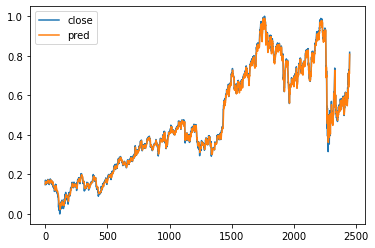

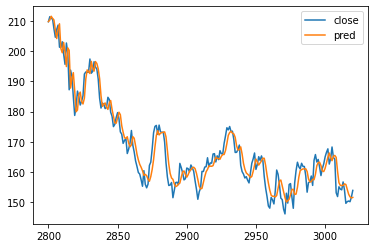

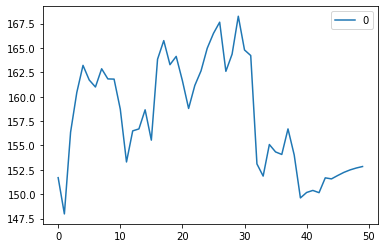

In [ ]:
plt.figure(figsize=(20,10))
Train1.plot()
Test1.plot()
pd.DataFrame(scaler.inverse_transform(X_test[220])).plot()
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
Train1.plot()

In [ ]:
df1 = pd.read_csv("/content/NIFTY 50_Data (1).csv", parse_dates=True)
df1.shape

In [ ]:
c = df1[['Close']]
tr = c
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(tr)
tr = scaler.fit_transform(tr)

In [ ]:
time_step = 50

X_tr, y_tr = create_dataset(tr, time_step)

In [ ]:
scaler.inverse_transform(y_tr.reshape(-1,1))

In [ ]:
X_tr.shape

In [ ]:
X_tr = X_tr.reshape(13,50,1)
print(scaler.inverse_transform(X_tr[12][:]))

In [ ]:
tpred = scaler.inverse_transform(model.predict(X_tr))
tpred

In [ ]:
Test2 = pd.DataFrame()
Test2['Open'] = df1['Open'].iloc[48:61]
Test2['Close'] = df1['Close'].iloc[48:61]
Test2['Pred'] = tpred
Test2['Profit'] = Test2['Close']-Test2['Open']
Test2['Preprofit'] = Test2['Pred']-Test2['Open']
Test2.head(14)

In [ ]:
plt.figure(figsize=(20,10))
Test2[['Close','Pred']].plot()

In [ ]:
scaler.inverse_transform(X_test[220])

array([[147.679993],
       [146.119995],
       [152.970001],
       [149.699997],
       [155.850006],
       [156.160004],
       [151.699997],
       [147.979996],
       [156.369995],
       [160.440002],
       [163.220001],
       [161.720001],
       [161.      ],
       [162.869995],
       [161.830002],
       [161.809998],
       [158.729996],
       [153.309998],
       [156.5     ],
       [156.699997],
       [158.660004],
       [155.550003],
       [163.850006],
       [165.759995],
       [163.289993],
       [164.139999],
       [161.649994],
       [158.800003],
       [161.160004],
       [162.660004],
       [164.979996],
       [166.5     ],
       [167.649994],
       [162.610001],
       [164.369995],
       [168.259995],
       [164.800003],
       [164.229996],
       [153.110001],
       [151.860001],
       [155.100006],
       [154.339996],
       [154.080002],
       [156.699997],
       [154.029999],
       [149.619995],
       [150.179993],
       [150.3